<a href="https://colab.research.google.com/github/Abhiroop25902/Algorithms/blob/ML-contrib-Abhiroop/src/MachineLearningAlgorithms/Deep_Learning/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [3]:
(x_train,y_train), (x_valid,y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)

(60000, 28, 28)


In [5]:
print(x_valid.shape)

(10000, 28, 28)


5


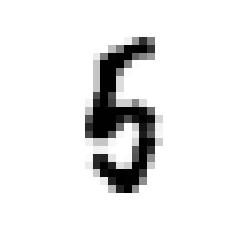

In [6]:
import matplotlib.pyplot as plt
import random

value = random.randint(0,x_train.shape[0])
plt.axis('off')
plt.imshow(x_train[value],cmap='Greys')
print(y_train[value])

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_valid = x_valid.reshape(x_valid.shape[0],x_valid.shape[1]*x_valid.shape[2])

print(x_train.shape)
print(x_valid.shape)

(60000, 784)
(10000, 784)


In [8]:
print(x_train[0].max())

255


In [9]:
x_train = x_train / 255
x_valid = x_valid / 255

print(x_train[0].max())

1.0


In [10]:
import tensorflow.keras as keras

num_category = 10

y_train = keras.utils.to_categorical(y_train,num_category)
y_valid = keras.utils.to_categorical(y_valid,num_category)

In [11]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [12]:
from tensorflow.keras.layers import Dense

model.add(Dense(units=784,activation='relu',input_shape=(784,)))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,022,490
Trainable params: 1,022,490
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_data=(x_valid,y_valid))

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3161 - accuracy: 0.9017 - val_loss: 0.1168 - val_accuracy: 0.9684
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1043 - accuracy: 0.9731 - val_loss: 0.1185 - val_accuracy: 0.9723
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9789 - val_loss: 0.1095 - val_accuracy: 0.9749
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0707 - accuracy: 0.9843 - val_loss: 0.1479 - val_accuracy: 0.9762
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9857 - val_loss: 0.1572 - val_accuracy: 0.9789
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9892 - val_loss: 0.1540 - val_accuracy: 0.9797
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9893 - val_loss: 0.1682 - val_accuracy:

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy')

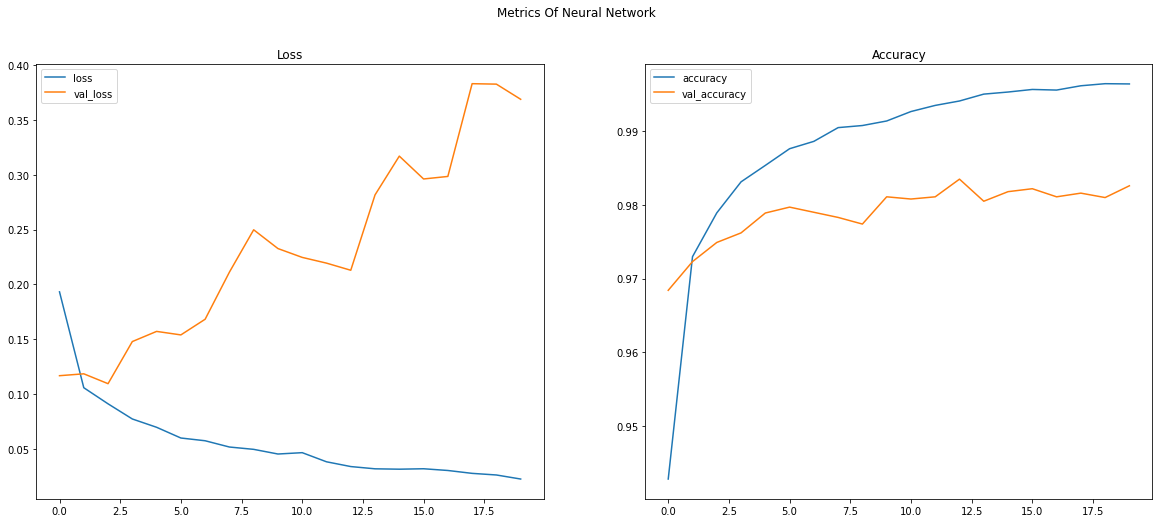

In [56]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(20,8)

fig.suptitle('Metrics Of Neural Network')

ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['loss','val_loss'])
ax1.set_title('Loss')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['accuracy','val_accuracy'])
ax2.set_title('Accuracy')
